In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [3]:
#Import birth rate csv
birth_df = pd.read_csv("Birth_Rate.csv")

In [4]:
#Import Mean birth age data, this was added later for further analysis. 
path = "Period Mean Birth Age.csv"
mean_birth_age_df = pd.read_csv(path)
mean_birth_age_df.head()

,Year,MAB40
0,1970,25.75
1,1971,25.71
2,1972,25.62
3,1973,25.55
4,1974,25.52


In [5]:
#Gender and Education Over the Years data came from two excel sheets, one with a range from 1970-1991 and another from 1992-2019
csv_path_1 = Path("1970-1991-Table 1.csv")
gender_1970_df = pd.read_csv(csv_path_1)

gender_1970_df.head()

,Year,Civilian labor force (thousands),Percent distribution,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Total,High school,NaN,College,NaN
1,NaN,NaN,NaN,Less than 4 years,"4 years, no college",1 to 3 years,4 years or more
2,Total,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,"61,765",100.0,36.1,38.1,11.8,14.1
4,1971,"62,344",100.0,34.5,38.4,12.3,14.8


In [6]:
#the 1992-2019 Gender Education data
csv_path_2 = Path("1992-2019-Table 1.csv")
gender_1992_df = pd.read_csv(csv_path_2)

gender_1992_df.head()

,Year,Civilian labor force (thousands),Percent distribution,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Total,Less than a high school diploma,"High school graduates, no college(1)",Some college or associate's degree,Bachelor's degree and higher(2)
1,Total,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,"103,018",100.0,12.1,35.7,25.6,26.6
3,1993,"104,237",100.0,11.3,35.1,26.6,27.0
4,1994,"105,610",100.0,10.8,33.9,27.7,27.6


In [7]:
# Column names were on different rows so I renamed all of them. 
gender_1970_df = gender_1970_df.rename(columns={"Unnamed: 3":"Less than a high school diploma",
                               "Unnamed: 4":"High school graduates, no college",
                               "Unnamed: 5":"Some college or associate's degree",
                               "Unnamed: 6":"Bachelor's degree and higher"})

In [8]:
# Made rename match in both timeframe dataframes
gender_1992_df = gender_1992_df.rename(columns={"Unnamed: 3":"Less than a high school diploma",
                               "Unnamed: 4":"High school graduates, no college",
                               "Unnamed: 5":"Some college or associate's degree",
                               "Unnamed: 6":"Bachelor's degree and higher"})

In [9]:
#dropped nan, in how="any" I made sure any row with Nan in any column would be dropped 
gender_1970_df = gender_1970_df.dropna(how="any")
gender_1970_df.head()

,Year,Civilian labor force (thousands),Percent distribution,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
3,1970,"61,765",100.0,36.1,38.1,11.8,14.1
4,1971,"62,344",100.0,34.5,38.4,12.3,14.8
5,1972,"63,704",100.0,33.3,38.8,12.4,15.5
6,1973,"64,775",100.0,30.9,39.7,13.0,16.4
7,1974,"66,527",100.0,29.3,39.5,13.7,17.5


In [10]:
gender_1992_df = gender_1992_df.dropna(how="any")
gender_1992_df.head()

,Year,Civilian labor force (thousands),Percent distribution,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
2,1992,"103,018",100.0,12.1,35.7,25.6,26.6
3,1993,"104,237",100.0,11.3,35.1,26.6,27.0
4,1994,"105,610",100.0,10.8,33.9,27.7,27.6
5,1995,"107,032",100.0,10.4,33.2,28.1,28.3
6,1996,"108,932",100.0,10.6,32.9,27.8,28.7


In [11]:
#Here I realized that the original csv's had data that was divided by Gender, but when I dropped NaN that separator row was also dropped 
#because the row index said Women and the rest of the row was empty, so it was dropped. 
#Below I am using .iloc to slice data into total, women, men for both dataframes. 

gender_1992_total_df = gender_1992_df.iloc[0:28]

In [12]:
gender_1992_women_df = gender_1992_df.iloc[27:56]

In [13]:
gender_1970_total_df = gender_1970_df.iloc[0:22]

In [14]:
gender_1970_women_df = gender_1970_df.iloc[22:44]

In [15]:
#Finally here I could concat the data from both timeframes into one. 
women_70_19_df = pd.concat([gender_1970_women_df,gender_1992_women_df], axis=0)
women_70_19_df.tail()

,Year,Civilian labor force (thousands),Percent distribution,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
54,2015,"59,252",100.0,6.1,23.2,29.6,41.1
55,2016,"60,049",100.0,6.0,22.9,29.6,41.6
56,2017,"60,614",100.0,5.8,22.7,28.9,42.7
57,2018,"61,182",100.0,5.7,22.3,28.3,43.8
58,2019,"61,704",100.0,5.4,22.0,27.5,45.0


In [16]:
#When i tried to plot data i ran into an issue with datatype for those columns which was an object, not numberic thus could not be plotted
women_70_19_col_df = women_70_19_df[["Year","Less than a high school diploma",  "High school graduates, no college", "Some college or associate's degree", "Bachelor's degree and higher"]]
women_70_19_col_df.dtypes

Year                                  object
Less than a high school diploma       object
High school graduates, no college     object
Some college or associate's degree    object
Bachelor's degree and higher          object
dtype: object

In [17]:
#Changed all columns to numeric. 
for column in women_70_19_col_df.columns:
    women_70_19_col_df[column] = pd.to_numeric(women_70_19_col_df[column], errors='coerce')

/var/folders/fg/8tsgxb6s07x1cjstms_qn8pc0000gn/T/ipykernel_35591/1866480800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_70_19_col_df[column] = pd.to_numeric(women_70_19_col_df[column], errors='coerce')


In [19]:
#Working here on cleanup for birth rates
birth_df = birth_df.rename( columns={"SPDYNCBRTINUSA":"Crude Birth Rate"})

In [20]:
#Converted date to a datetime series that way I could extract the year from the date and then slice data to match other data
birth_df['DATE'] = pd.to_datetime(birth_df['DATE'])
birth_df["Year"] = birth_df['DATE'].dt.year

In [21]:
birth_df.head()

,DATE,Crude Birth Rate,Year
0,1960-01-01,23.7,1960
1,1961-01-01,23.3,1961
2,1962-01-01,22.4,1962
3,1963-01-01,21.7,1963
4,1964-01-01,21.1,1964


In [22]:
#dropped the DATE column , bye bye 
birth_year_df = birth_df[["Year", "Crude Birth Rate"]]

In [23]:
#Sliced data to be from years 1970-2019 
birth_year_70_19_df = birth_year_df.iloc[10:60]

In [24]:
#added birth rate to education data
birth_women_ed_merged = pd.merge(birth_year_70_19_df, women_70_19_col_df, on='Year', how='inner')
birth_women_ed_merged.tail()

,Year,Crude Birth Rate,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
46,2016,12.2,6.0,22.9,29.6,41.6
47,2017,11.8,5.8,22.7,28.9,42.7
48,2018,11.6,5.7,22.3,28.3,43.8
49,2019,11.4,7.0,25.4,26.3,41.2
50,2019,11.4,5.4,22.0,27.5,45.0


In [25]:
#In the above table you see that 2019 had two rows, so I dropped the 2019 row that was incorrect. 
birth_women_ed_merged = birth_women_ed_merged.drop(index=49)
birth_women_ed_merged.tail()

,Year,Crude Birth Rate,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
45,2015,12.4,6.1,23.2,29.6,41.1
46,2016,12.2,6.0,22.9,29.6,41.6
47,2017,11.8,5.8,22.7,28.9,42.7
48,2018,11.6,5.7,22.3,28.3,43.8
50,2019,11.4,5.4,22.0,27.5,45.0


In [26]:
birth_women_ed_merged.set_index("Year").tail()

,Crude Birth Rate,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
Year,,,,,
2015,12.4,6.1,23.2,29.6,41.1
2016,12.2,6.0,22.9,29.6,41.6
2017,11.8,5.8,22.7,28.9,42.7
2018,11.6,5.7,22.3,28.3,43.8
2019,11.4,5.4,22.0,27.5,45.0


<Axes: xlabel='Year'>

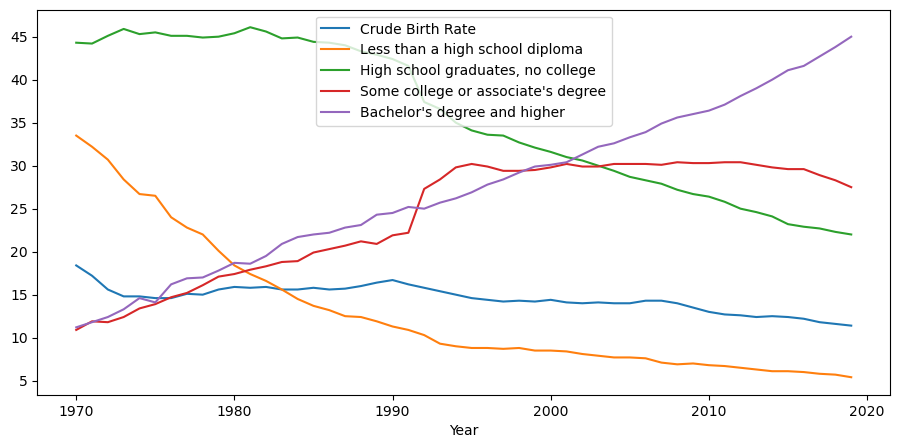

In [27]:
birth_women_ed_merged.plot(x='Year', figsize=(11,5))

In [28]:
#correlations here were very cool! Basically only looking at Crude BR column. 
birth_women_corr = birth_women_ed_merged.corr()
birth_women_corr

,Year,Crude Birth Rate,Less than a high school diploma,"High school graduates, no college",Some college or associate's degree,Bachelor's degree and higher
Year,1.000000,-0.841073,-0.897957,-0.967657,0.903557,0.997244
Crude Birth Rate,-0.841073,1.000000,0.639130,0.857946,-0.665682,-0.850255
Less than a high school diploma,-0.897957,0.639130,1.000000,0.791136,-0.942036,-0.891988
"High school graduates, no college",-0.967657,0.857946,0.791136,1.000000,-0.875872,-0.957299
Some college or associate's degree,0.903557,-0.665682,-0.942036,-0.875872,1.000000,0.879642
Bachelor's degree and higher,0.997244,-0.850255,-0.891988,-0.957299,0.879642,1.000000


In [29]:
#created this sub-dataset to contain the most interesting correlation between bachelors degrees and birth rate
birth_women_core = birth_women_ed_merged[["Year","Crude Birth Rate", "Bachelor's degree and higher"]]
birth_women_core.head()

,Year,Crude Birth Rate,Bachelor's degree and higher
0,1970,18.4,11.2
1,1971,17.2,11.8
2,1972,15.6,12.4
3,1973,14.8,13.3
4,1974,14.8,14.6


<Axes: xlabel='Year'>

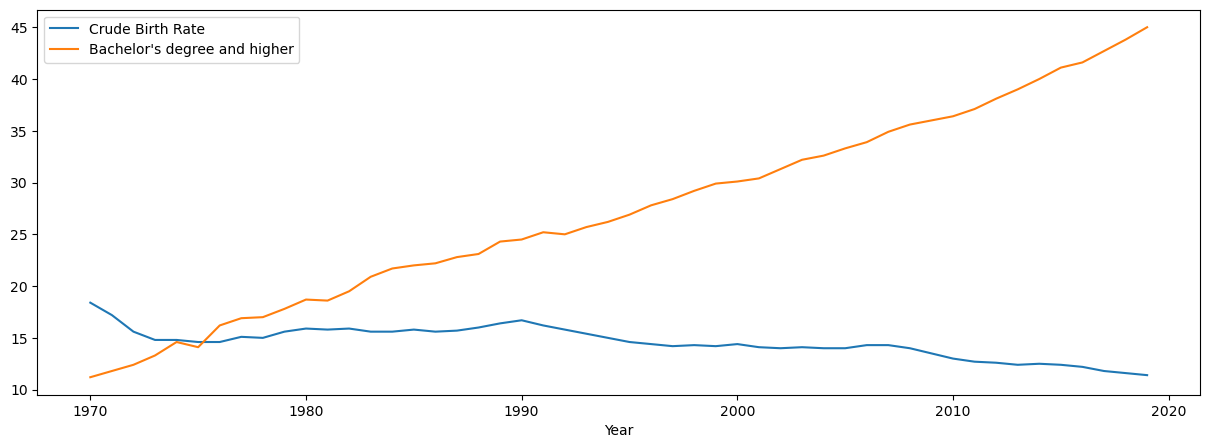

In [30]:
birth_women_core = birth_women_core.set_index("Year")
birth_women_core.plot(figsize=(15,5))

<function matplotlib.pyplot.show(close=None, block=None)>

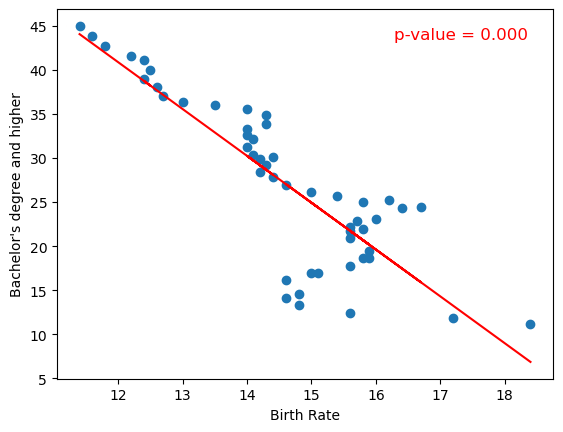

In [49]:
#Linear regression analysis for birth rate and women with a bachelors degree or higher
x_values = birth_women_core["Crude Birth Rate"]
y_values = birth_women_core["Bachelor's degree and higher"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Birth Rate")
plt.ylabel("Bachelor's degree and higher")
plt.annotate(f'p-value = {pvalue:.3f}', xy=(0.95, 0.95), xycoords='axes fraction', 
             horizontalalignment='right', verticalalignment='top', fontsize=12, color='red')
plt.show

In [32]:
#Started working with birth age data that should the median age women had a child that 
mean_birth_age_df = mean_birth_age_df.rename( columns={"MAB40":"Mean Age at Birth"})

In [33]:
#Merged Mean Age at birth with other data
birth_age_rate_df = pd.merge(birth_women_core, mean_birth_age_df, on="Year")
birth_age_rate_df.tail()

,Year,Crude Birth Rate,Bachelor's degree and higher,Mean Age at Birth
45,2015,12.4,41.1,28.68
46,2016,12.2,41.6,28.84
47,2017,11.8,42.7,28.93
48,2018,11.6,43.8,29.05
49,2019,11.4,45.0,29.10


In [34]:
#Set index to year to better see the correlation table.
birth_age_rate_df.set_index("Year", inplace=True)

In [35]:
Birth_age_rate_corr = birth_age_rate_df.corr()
Birth_age_rate_corr

,Crude Birth Rate,Bachelor's degree and higher,Mean Age at Birth
Crude Birth Rate,1.000000,-0.850255,-0.867903
Bachelor's degree and higher,-0.850255,1.000000,0.977717
Mean Age at Birth,-0.867903,0.977717,1.000000


In [36]:
#Had to change the bachelor's degree column name to remove the apostrophe, it was causing issues in plot code. 
birth_age_rate_df['Bachelors or higher'] = birth_age_rate_df["Bachelor's degree and higher"]

In [37]:
#Reset index to make plot code easier for me to understand. 
birth_age_rate_df.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

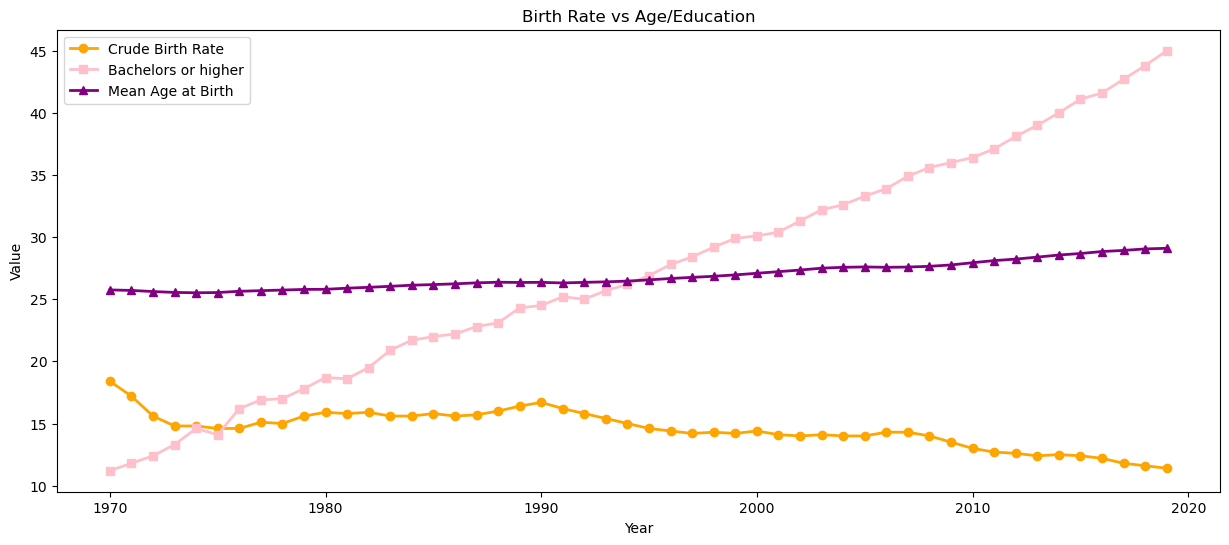

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(birth_age_rate_df['Year'], birth_age_rate_df['Crude Birth Rate'], 
         color='orange', label='Crude Birth Rate', marker='o', linewidth=2)  
plt.plot(birth_age_rate_df['Year'], birth_age_rate_df['Bachelors or higher'], 
         color='pink', label='Bachelors or higher', marker='s', linewidth=2)  
plt.plot(birth_age_rate_df['Year'], birth_age_rate_df['Mean Age at Birth'], 
         color='purple', label='Mean Age at Birth', marker='^', linewidth=2)  

plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Birth Rate vs Age/Education')
plt.show

<Axes: >

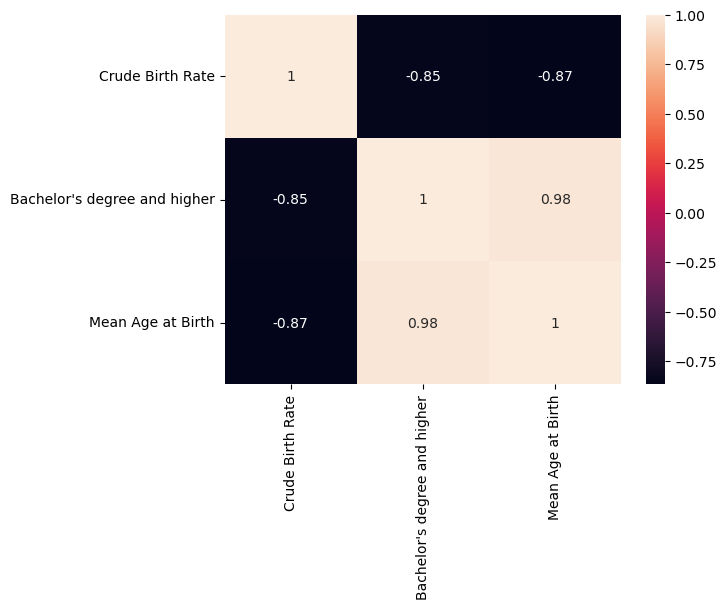

In [43]:
sns.heatmap(Birth_age_rate_corr, annot=True)

Text(0, 0.5, 'Mean Age at Birth')

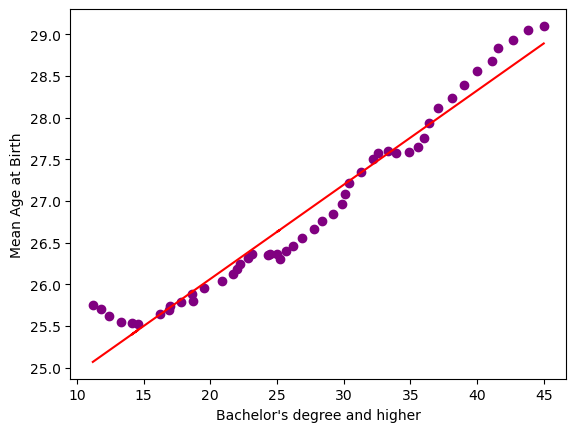

In [50]:
#Linear regression to represent the highly correlated bachelors degree and higher and mean age at birth data
x_values = birth_women_core["Bachelor's degree and higher"]
y_values = birth_age_rate_df["Mean Age at Birth"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='purple')
plt.plot(x_values, regress_values, "r-")
plt.show
plt.xlabel("Bachelor's degree and higher")
plt.ylabel("Mean Age at Birth")